In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [60]:
df = pd.read_csv("./datasets/Carprice_assignment.csv")
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [61]:
cdf = df[["fueltype","aspiration","carbody","enginetype","enginesize","cylindernumber","compressionratio",
         "horsepower","peakrpm","citympg","highwaympg","price"]]
cdf.head(10)

,fueltype,aspiration,carbody,enginetype,enginesize,cylindernumber,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,convertible,dohc,130,four,9.0,111,5000,21,27,13495.000
1,gas,std,convertible,dohc,130,four,9.0,111,5000,21,27,16500.000
2,gas,std,hatchback,ohcv,152,six,9.0,154,5000,19,26,16500.000
3,gas,std,sedan,ohc,109,four,10.0,102,5500,24,30,13950.000
4,gas,std,sedan,ohc,136,five,8.0,115,5500,18,22,17450.000
5,gas,std,sedan,ohc,136,five,8.5,110,5500,19,25,15250.000
6,gas,std,sedan,ohc,136,five,8.5,110,5500,19,25,17710.000
7,gas,std,wagon,ohc,136,five,8.5,110,5500,19,25,18920.000
8,gas,turbo,sedan,ohc,131,five,8.3,140,5500,17,20,23875.000
9,gas,turbo,hatchback,ohc,131,five,7.0,160,5500,16,22,17859.167


In [62]:
cdf.describe()

,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,41.642693,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [63]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le6 = LabelEncoder()

fueltype_label = le1.fit_transform(cdf.fueltype)
aspiration_label = le2.fit_transform(cdf.aspiration)
carbody_label = le3.fit_transform(cdf.carbody)
enginetype_label = le4.fit_transform(cdf.enginetype)
cylinders_label = le6.fit_transform(cdf.cylindernumber)

In [64]:
cdf = cdf.drop("fueltype", axis="columns")
cdf = cdf.drop("aspiration", axis="columns")
cdf = cdf.drop("carbody", axis="columns")
cdf = cdf.drop("enginetype", axis="columns")
cdf = cdf.drop("cylindernumber", axis="columns")

In [65]:
cdf["fuel_type"] = fueltype_label
cdf["aspiration_"] = aspiration_label
cdf["car_body"] = carbody_label
cdf["engine_type"] = enginetype_label
cdf["cylinder_number"] = cylinders_label

In [66]:
cdf.head(10)

,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_type,aspiration_,car_body,engine_type,cylinder_number
0,130,9.0,111,5000,21,27,13495.000,1,0,0,0,2
1,130,9.0,111,5000,21,27,16500.000,1,0,0,0,2
2,152,9.0,154,5000,19,26,16500.000,1,0,2,5,3
3,109,10.0,102,5500,24,30,13950.000,1,0,3,3,2
4,136,8.0,115,5500,18,22,17450.000,1,0,3,3,1
5,136,8.5,110,5500,19,25,15250.000,1,0,3,3,1
6,136,8.5,110,5500,19,25,17710.000,1,0,3,3,1
7,136,8.5,110,5500,19,25,18920.000,1,0,4,3,1
8,131,8.3,140,5500,17,20,23875.000,1,1,3,3,1
9,131,7.0,160,5500,16,22,17859.167,1,1,2,3,1


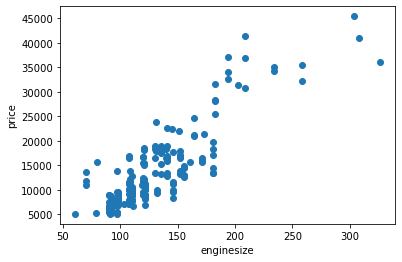

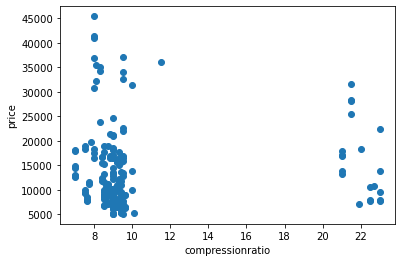

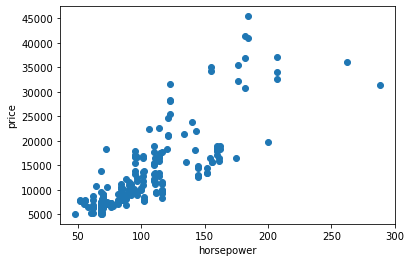

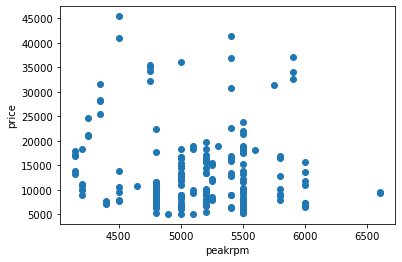

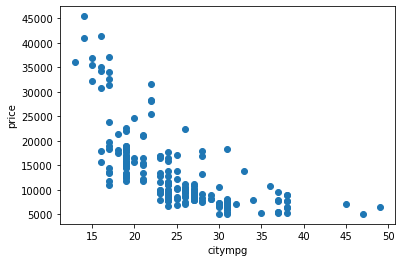

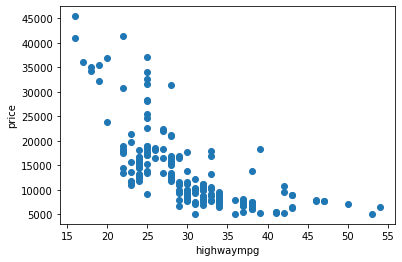

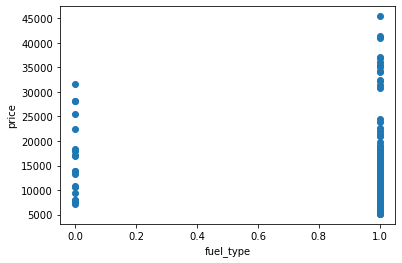

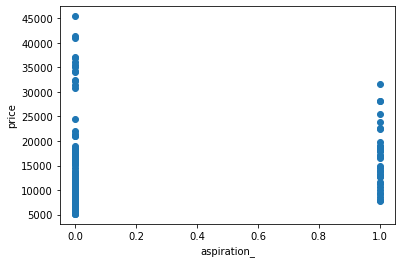

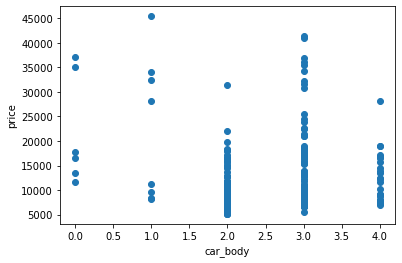

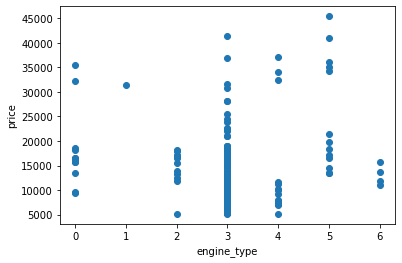

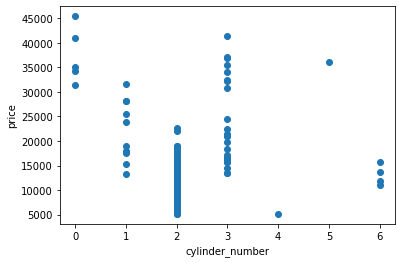

In [67]:
temp_arr = np.array(cdf.columns)
temp_arr = np.delete(temp_arr, 6)

for x in temp_arr :
    plt.scatter(cdf[[x]], cdf[["price"]])
    plt.xlabel(x)
    plt.ylabel("price")
    plt.show()

In [113]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
test.head()

,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_type,aspiration_,car_body,engine_type,cylinder_number
1,130,9.0,111,5000,21,27,16500.0,1,0,0,0,2
2,152,9.0,154,5000,19,26,16500.0,1,0,2,5,3
13,164,9.0,121,4250,21,28,21105.0,1,0,3,3,3
33,92,9.2,76,6000,30,34,6529.0,1,0,2,3,2
35,92,9.2,76,6000,30,34,7295.0,1,0,3,3,2


In [114]:
model = linear_model.LinearRegression()

train_x = np.asanyarray(train[["fuel_type","aspiration_","car_body","engine_type","enginesize","cylinder_number",
                               "compressionratio", "horsepower","peakrpm","citympg","highwaympg"]])
train_y = np.asanyarray(train[["price"]])

model.fit(train_x, train_y)

coeff = model.coef_
inter = model.intercept_

print("Coefficients : ", coeff)
print("Intercept : ", inter)

Coefficients :  [[-3.38929283e+03 -1.45823149e+03 -1.73078370e+02  4.21851959e+02
   1.00461363e+02 -4.54246117e+02  1.57113060e+02  5.73002926e+01
   1.86213652e+00 -5.54730728e+01 -1.44799684e+02]]
Intercept :  [-7335.52023558]


In [115]:
test_x = np.asanyarray(test[["fuel_type","aspiration_","car_body","engine_type","enginesize","cylinder_number",
                               "compressionratio", "horsepower","peakrpm","citympg","highwaympg"]])
test_y = np.asanyarray(test[["price"]])
pred_y = model.predict(test_x)

print("Mean absolute error : %.2f" %np.mean(np.absolute(pred_y - test_y)))
print("Score : %.2f" %model.score(test_x, test_y))

Mean absolute error : 2682.23
Score : 0.86


In [71]:
user_1 = str(input("Enter fuel type (diesel, gas) : "))
user_2 = str(input("Enter aspiration (std, turbo) : "))
user_3 = str(input("Enter car body type (convertible, hardtop, hatchback, sedan, wagon) : "))
user_4 = str(input("Enter engine type (dohc, dohcv, l, ohc, ohcf, ohcv, rotor) : "))
user5 = float(input("Enter engine size : "))
user6_temp = int(input("Enter number of cylinders (2,3,4,5,6,8,12) : "))
user7 = float(input("Enter compression ratio : "))
user8 = float(input("Enter horsepower : "))
user9 = float(input("Enter peak rpm : "))
user10 = float(input("Enter city mileage : "))
user11 = float(input("Enter highway mileage : "))

temp_arr1 = [2,3,4,5,6,8,12]
temp_arr2 = ['two','three','four','five','six','eight','twelve']

for var in range(0,len(temp_arr1)):
    if user6_temp == temp_arr1[var]:
        break

user_6 = temp_arr2[var]

user1 = le1.transform([user_1])
user2 = le2.transform([user_2])
user3 = le3.transform([user_3])
user4 = le4.transform([user_4])
user6 = le6.transform([user_6])

output = model.predict([[user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11]])
print()
print("Price : $%.2f" %output)

KeyboardInterrupt: Interrupted by user